<a href="https://colab.research.google.com/github/AIhexNICK-MAIL-RU/ML-projects-new/blob/main/Netology_ML_HW3_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **«Оценка точности модели, переобучение, регуляризация»**

#### **Цель**: закрепить знания о математическом смысле метрик TPR, FPR. Изучить построение ROC-кривой, графика Precision-Recall.

#### Описание задания:
Решить задачу классификации при помощи обучения модели логистической регрессии. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.

## Этапы работы:

## 1 Преобразуйте данные:


### a проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [ ]:
data.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [ ]:
data[data['height'].isna()].head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
12,258556239,Abbas Qali,IOA,male,10/11/92,NaN,NaN,aquatics,0,0,0
47,469953606,Abdoullah Bamoussa,ITA,male,6/8/86,NaN,NaN,athletics,0,0,0
50,325809293,Abdul Omar,GHA,male,10/3/93,NaN,NaN,boxing,0,0,0
52,262868423,Abdulaziz Alshatti,IOA,male,10/30/90,NaN,NaN,fencing,0,0,0
56,897549624,Abdullah Hel Baki,BAN,male,8/1/89,NaN,NaN,shooting,0,0,0


In [ ]:
data = data.fillna(-1)

In [ ]:
data['height'].unique()

array([ 1.72,  1.68,  1.98,  1.83,  1.81,  1.8 ,  2.05,  1.93,  1.65,
        1.7 ,  1.75, -1.  ,  1.61,  1.78,  1.76,  2.1 ,  1.73,  1.85,
        1.77,  1.9 ,  1.86,  1.74,  1.6 ,  2.07,  1.88,  1.66,  1.62,
        1.87,  2.03,  1.69,  1.82,  1.89,  1.94,  1.95,  1.71,  1.84,
        1.91,  1.67,  2.02,  1.58,  1.63,  1.79,  1.97,  1.56,  1.55,
        1.57,  1.46,  1.92,  1.64,  1.53,  1.99,  1.96,  2.  ,  2.04,
        1.47,  1.52,  2.01,  1.51,  1.59,  2.08,  1.37,  1.5 ,  1.45,
        2.06,  1.54,  2.11,  1.43,  1.49,  1.33,  1.48,  1.44,  2.13,
        2.09,  2.21,  2.18,  1.21,  1.38,  1.34,  2.15,  2.17,  1.42,
        1.4 ,  2.14])

In [ ]:
# удаляем ячейки с отсутствием данных
data = data[~(data['height'].isna())]
data = data[~(data['weight'].isna())]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11538 non-null  object 
 5   height       11538 non-null  float64
 6   weight       11538 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1.1+ MB


In [ ]:
data.isna().sum()

id             0
name           0
nationality    0
sex            0
dob            0
height         0
weight         0
sport          0
gold           0
silver         0
bronze         0
dtype: int64

In [ ]:
data

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0


In [ ]:
data[data['height'].isna()].head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze


### b. закодируйте категориальные переменные числовыми значениями по необходимости.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
ft0 = pd.DataFrame(le.fit_transform(data[['nationality']]))
ft1 = pd.DataFrame(le.fit_transform(data[['sex']]))
ft2 = pd.DataFrame(le.fit_transform(data[['sport']]))

ft0.info(), ft0.head(), ft1.info(), ft1.head(), ft2.info(), ft2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       11538 non-null  int64
dtypes: int64(1)
memory usage: 90.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       11538 non-null  int64
dtypes: int64(1)
memory usage: 90.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       11538 non-null  int64
dtypes: int64(1)
memory usage: 90.3 KB


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(None,
      0
 0   59
 1  102
 2   33
 3  119
 4  141,
 None,
    0
 0  1
 1  0
 2  1
 3  1
 4  1,
 None,
     0
 0   2
 1   9
 2   2
 3  22
 4   7)

In [ ]:
df_row_concat = pd.concat([ft0, ft1, ft2],axis=1)
df_row_concat.columns = ['nationality', 'sex', 'sport']
df_row_concat.head()

,nationality,sex,sport
0,59,1,2
1,102,0,9
2,33,1,2
3,119,1,22
4,141,1,7


In [ ]:
df_choice = data[['height','weight','gold','silver','bronze']] #.astype(np.float64, errors='ignore')
df_choice.head()

,height,weight,gold,silver,bronze
0,1.72,64.0,0,0,0
1,1.68,56.0,0,0,0
2,1.98,79.0,0,0,1
3,1.83,80.0,0,0,0
4,1.81,71.0,0,0,0


In [ ]:
df = pd.concat([df_row_concat, df_choice],axis=1)
df.head()

,nationality,sex,sport,height,weight,gold,silver,bronze
0,59,1,2,1.72,64.0,0,0,0
1,102,0,9,1.68,56.0,0,0,0
2,33,1,2,1.98,79.0,0,0,1
3,119,1,22,1.83,80.0,0,0,0
4,141,1,7,1.81,71.0,0,0,0


## 2 Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['weight','gold','silver','bronze','nationality', 'height', 'sport']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test.index

Int64Index([5187, 6260, 2069, 7259, 4995, 7070, 6535, 5609, 5340, 1941,
            ...
             349, 8065, 8214, 7874, 7688, 3989, 3026, 7764, 5012, 7556],
           dtype='int64', length=2308)

## 3 Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.

In [ ]:
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, class_weight='balanced'))

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [ ]:
predictions = model.predict_proba(X_test)

In [ ]:
model.predict_proba(X_test)

array([[0.95467185, 0.04532815],
       [0.42132834, 0.57867166],
       [0.29762172, 0.70237828],
       ...,
       [0.45615993, 0.54384007],
       [0.67331392, 0.32668608],
       [0.33687399, 0.66312601]])

In [ ]:
pred_proba = model.predict_proba(X_test)
pred_proba

array([[0.95467185, 0.04532815],
       [0.42132834, 0.57867166],
       [0.29762172, 0.70237828],
       ...,
       [0.45615993, 0.54384007],
       [0.67331392, 0.32668608],
       [0.33687399, 0.66312601]])

In [ ]:
model.predict(X_test)

array([0, 1, 1, ..., 1, 0, 1])

#### ROC-кривая (ROC-curve)

In [ ]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [ ]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])

In [ ]:
# for line in zip(fpr[:10], tpr[:10], thres[:10]):
#     print(line)

In [ ]:
import matplotlib.pyplot as plt

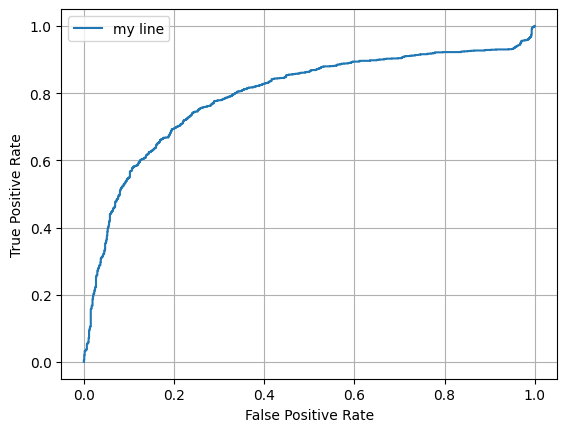

In [ ]:
plt.plot(fpr, tpr, label='my line' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=0)
plt.grid()
plt.show()

In [ ]:
model.predict(X_test)

array([0, 1, 1, ..., 1, 0, 1])

## 4 Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svc = SVC()

In [ ]:
svc.fit(X_train,y_train)

SVC()

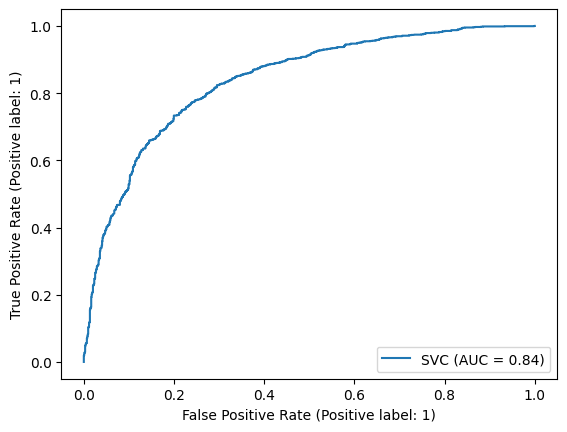

In [ ]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
# rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=svc_disp.ax_)

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
X_test_pred = svc.predict(X_test)
X_test_pred

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
roc_auc_score(y_test, predictions[:, 1])

0.7928020442676819

## 5 Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.

### не помню что за реализация

In [ ]:
from numpy import arange
thresholds = arange(0, 1, 0.1)
#predictions определены выше
fprs = []
tprs = []
prs = []
res = []
pr_custom = []
for threshold in thresholds:
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    for predicted_prob, actual in zip( predictions[:, 1], y_test ):
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    tpr2 = tp/(tp + fn)
    fpr2 = fp/(fp + tn)
    precision = tp/(tp + fp)
    recall = tpr2 #по определению
    fprs.append(fpr2)
    tprs.append(tpr2)
    prs.append(precision)
    res.append(recall)

In [ ]:
tp, fp, fn, tn

(907, 228, 364, 809)

In [ ]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.7435008665511266

In [ ]:
precision = tp / (tp + fp)
precision

0.7991189427312775

In [ ]:
recall = tp / (tp + fn)
recall

0.7136113296616837

In [ ]:
from sklearn.metrics import recall_score, precision_score

In [ ]:
pred = model.predict(X_test)

In [ ]:
recall_score(y_test, pred)

0.7136113296616837

In [ ]:
precision_score(y_test, pred)

0.7991189427312775

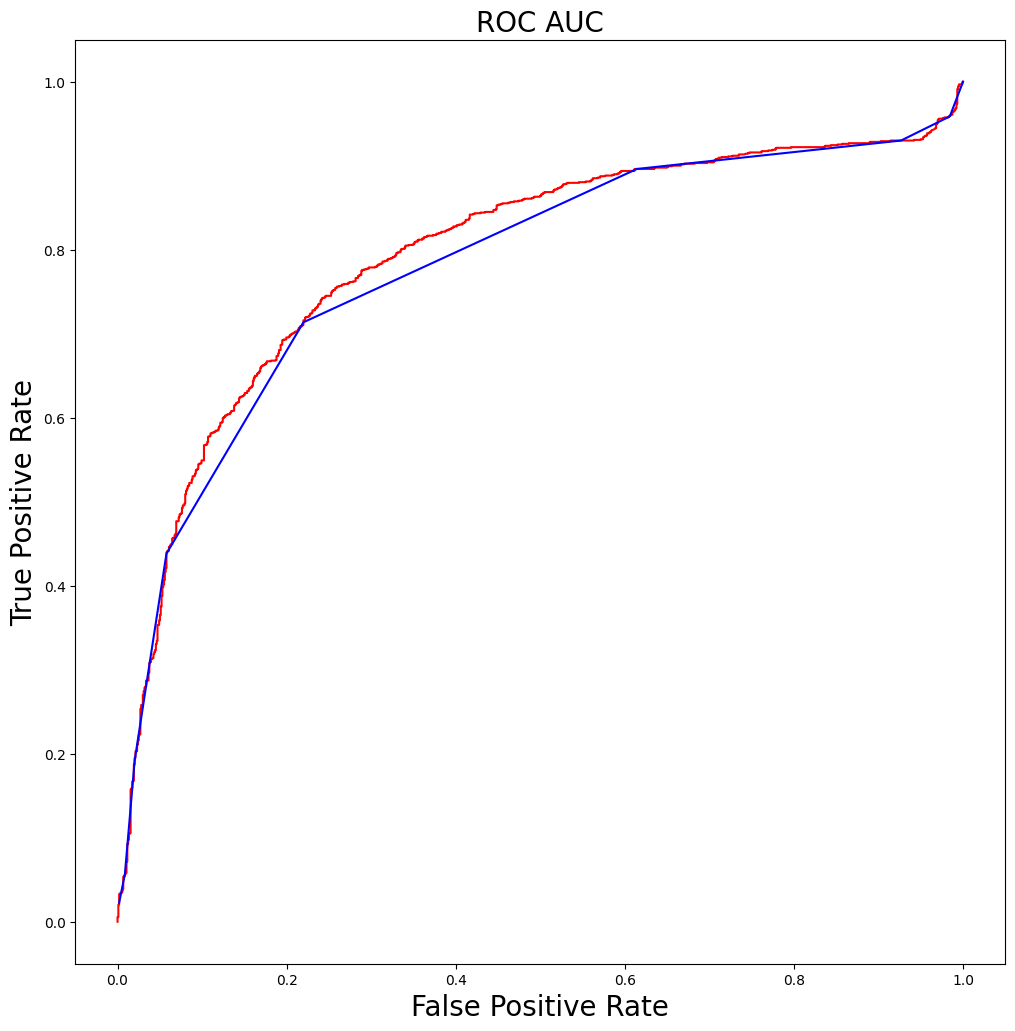

In [ ]:
plt.figure(figsize=(12, 12))
plt.plot(fpr, tpr, color="red")
plt.plot(fprs, tprs, color="blue")
plt.title('ROC AUC', fontdict={'fontsize': 20})
plt.xlabel('False Positive Rate', fontdict={'fontsize': 20})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 20})
plt.show()

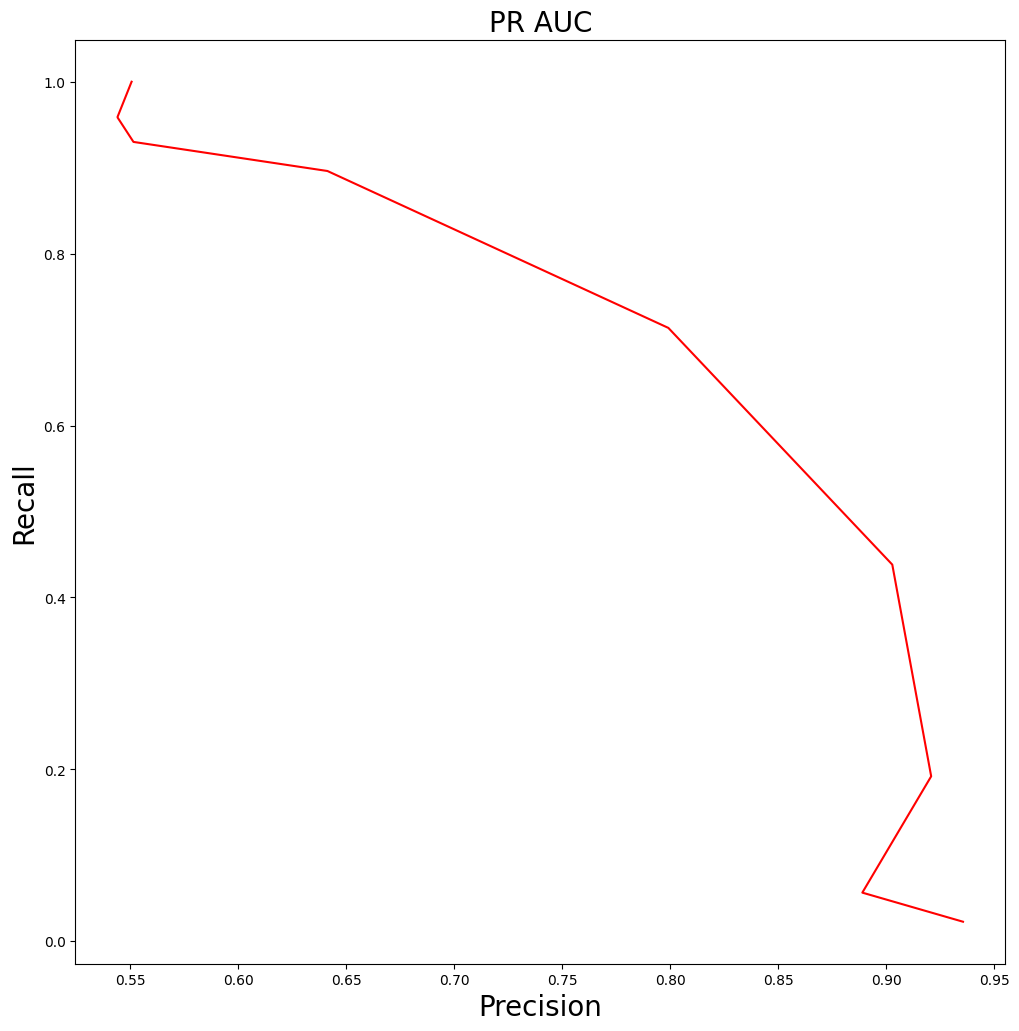

In [ ]:
plt.figure(figsize=(12, 12))
plt.plot(prs, res, color="red")
plt.title('PR AUC', fontdict={'fontsize': 20})
plt.xlabel('Precision', fontdict={'fontsize': 20})
plt.ylabel('Recall', fontdict={'fontsize': 20})
plt.show()

### ручная реализация из доп материалов

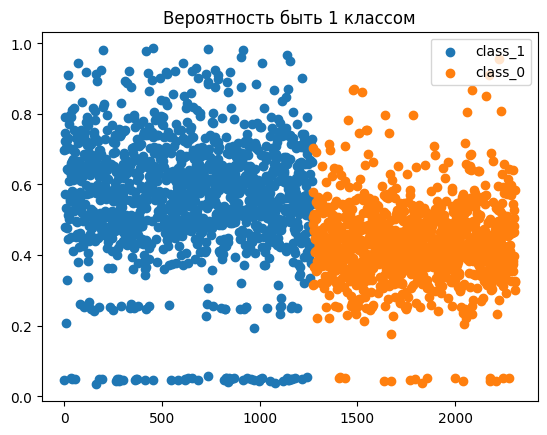

In [ ]:
class_1 = pred_proba[:, 1][y_test == 1]
class_0 = pred_proba[:, 1][y_test == 0]

plt.scatter(np.arange(len(class_1)), class_1, label='class_1')
plt.scatter(np.arange(len(class_1), len(class_1)+len(class_0)), class_0, label='class_0')
plt.title('Вероятность быть 1 классом')
plt.legend();

### Отсечка 0.5

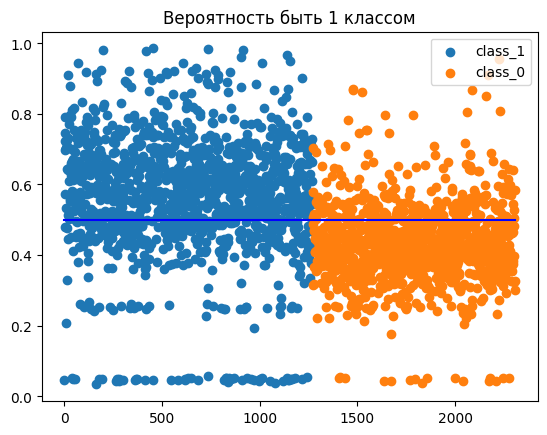

In [ ]:
threshold = 0.5
class_1 = pred_proba[:, 1][y_test == 1]
class_0 = pred_proba[:, 1][y_test == 0]

plt.scatter(np.arange(len(class_1)), class_1, label='class_1')
plt.scatter(np.arange(len(class_1), len(class_1)+len(class_0)), class_0, label='class_0')
plt.plot([-0.2, len(pred_proba[:, 1])], [threshold, threshold], c='b')
plt.title('Вероятность быть 1 классом')
plt.legend();

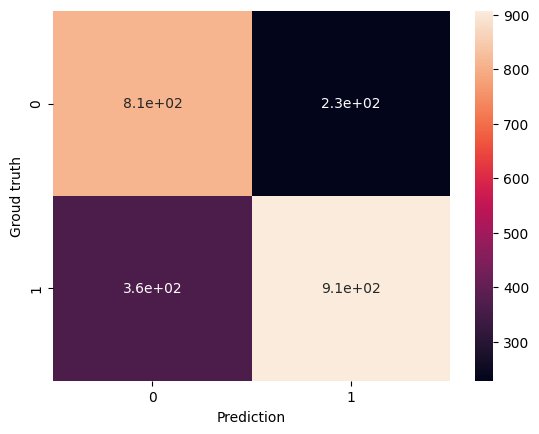

In [ ]:
from sklearn.metrics import confusion_matrix


pred = np.where(pred_proba[:, 1] >= threshold, 1, 0)

cm = confusion_matrix(y_test, pred)
f = sns.heatmap(cm, annot=True)
plt.ylabel('Groud truth')
plt.xlabel('Prediction');

In [ ]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

In [ ]:
print('TPR', TP / (TP + FN))
print('FPR', FP / (FP + TN))

TPR 0.7136113296616837
FPR 0.21986499517839922


### Отсечка 0.6

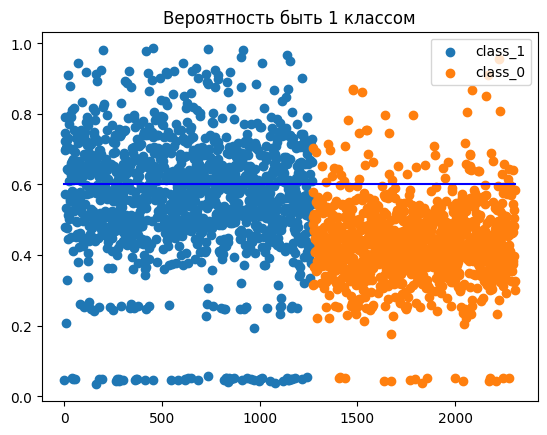

In [ ]:
threshold = 0.6

class_1 = pred_proba[:, 1][y_test == 1]
class_0 = pred_proba[:, 1][y_test == 0]

pred = np.where(pred_proba[:, 1] >= threshold, 1, 0)

plt.scatter(np.arange(len(class_1)), class_1, label='class_1')
plt.scatter(np.arange(len(class_1), len(class_1)+len(class_0)), class_0, label='class_0')
plt.plot([-0.2, len(pred_proba[:, 1])], [threshold, threshold], c='b')
plt.title('Вероятность быть 1 классом')
plt.legend();

TPR 0.43823760818253343
FPR 0.05785920925747348


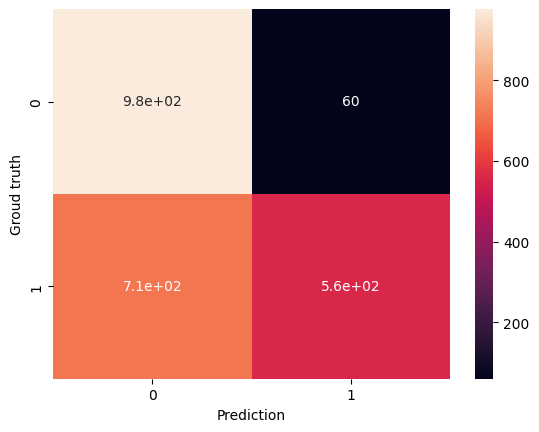

In [ ]:
cm = confusion_matrix(y_test, pred)
TN, FP, FN, TP = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
print('TPR', TP / (TP + FN))
print('FPR', FP / (FP + TN))

f = sns.heatmap(cm, annot=True)
plt.ylabel('Groud truth')
plt.xlabel('Prediction');

### Отсечка 0

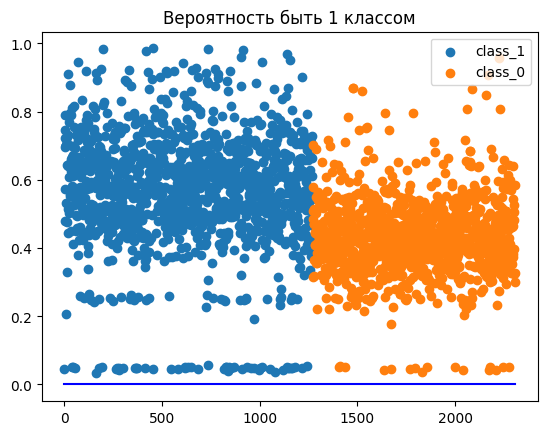

In [ ]:
threshold = 0

class_1 = pred_proba[:, 1][y_test == 1]
class_0 = pred_proba[:, 1][y_test == 0]

pred = np.where(pred_proba[:, 1] >= threshold, 1, 0)

plt.scatter(np.arange(len(class_1)), class_1, label='class_1')
plt.scatter(np.arange(len(class_1), len(class_1)+len(class_0)), class_0, label='class_0')
plt.plot([-0.2, len(pred_proba[:, 1])], [threshold, threshold], c='b')
plt.title('Вероятность быть 1 классом')
plt.legend();

TPR 1.0
FPR 1.0


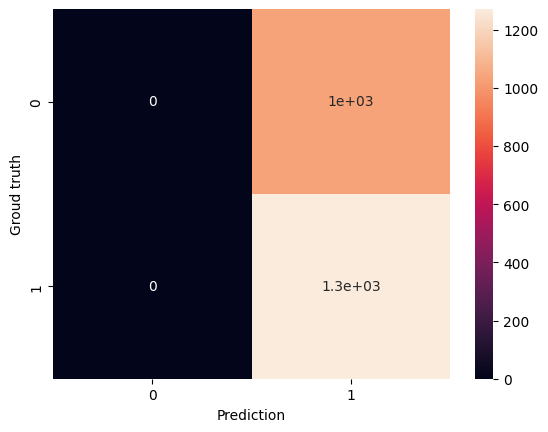

In [ ]:
cm = confusion_matrix(y_test, pred)
TN, FP, FN, TP = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
print('TPR', TP / (TP + FN))
print('FPR', FP / (FP + TN))

f = sns.heatmap(cm, annot=True)
plt.ylabel('Groud truth')
plt.xlabel('Prediction');

In [ ]:
pred_proba = model.predict_proba(X_test)
pred_proba

array([[0.95467185, 0.04532815],
       [0.42132834, 0.57867166],
       [0.29762172, 0.70237828],
       ...,
       [0.45615993, 0.54384007],
       [0.67331392, 0.32668608],
       [0.33687399, 0.66312601]])

## 6 Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.

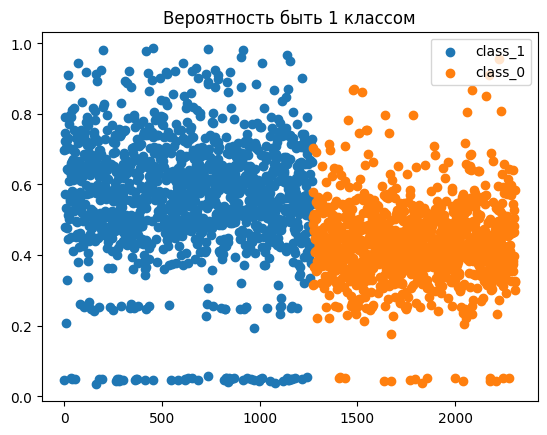

In [ ]:
class_1 = pred_proba[:, 1][y_test == 1]
class_0 = pred_proba[:, 1][y_test == 0]

plt.scatter(np.arange(len(class_1)), class_1, label='class_1')
plt.scatter(np.arange(len(class_1), len(class_1)+len(class_0)), class_0, label='class_0')
plt.title('Вероятность быть 1 классом')
plt.legend();

### Отсечка 0.5

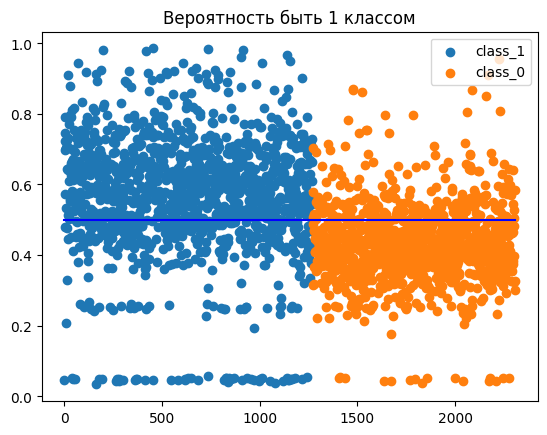

In [ ]:
threshold = 0.5
class_1 = pred_proba[:, 1][y_test == 1]
class_0 = pred_proba[:, 1][y_test == 0]

plt.scatter(np.arange(len(class_1)), class_1, label='class_1')
plt.scatter(np.arange(len(class_1), len(class_1)+len(class_0)), class_0, label='class_0')
plt.plot([-0.2, len(pred_proba[:, 1])], [threshold, threshold], c='b')
plt.title('Вероятность быть 1 классом')
plt.legend();

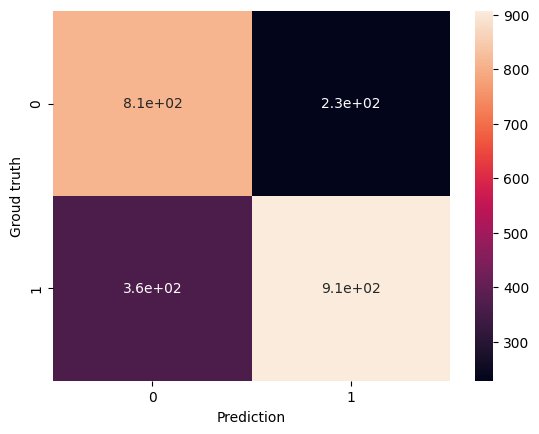

In [ ]:
from sklearn.metrics import confusion_matrix


pred = np.where(pred_proba[:, 1] >= threshold, 1, 0)

cm = confusion_matrix(y_test, pred)
f = sns.heatmap(cm, annot=True)
plt.ylabel('Groud truth')
plt.xlabel('Prediction');

In [ ]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

In [ ]:
print('TPR', TP / (TP + FN))
print('FPR', FP / (FP + TN))

TPR 0.7136113296616837
FPR 0.21986499517839922


### Отсечка 0.6

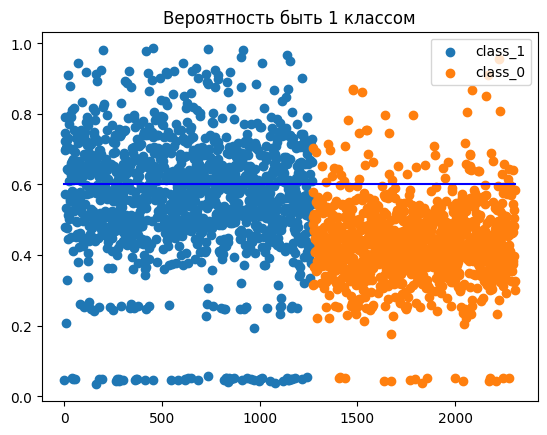

In [ ]:
threshold = 0.6

class_1 = pred_proba[:, 1][y_test == 1]
class_0 = pred_proba[:, 1][y_test == 0]

pred = np.where(pred_proba[:, 1] >= threshold, 1, 0)

plt.scatter(np.arange(len(class_1)), class_1, label='class_1')
plt.scatter(np.arange(len(class_1), len(class_1)+len(class_0)), class_0, label='class_0')
plt.plot([-0.2, len(pred_proba[:, 1])], [threshold, threshold], c='b')
plt.title('Вероятность быть 1 классом')
plt.legend();

TPR 0.43823760818253343
FPR 0.05785920925747348


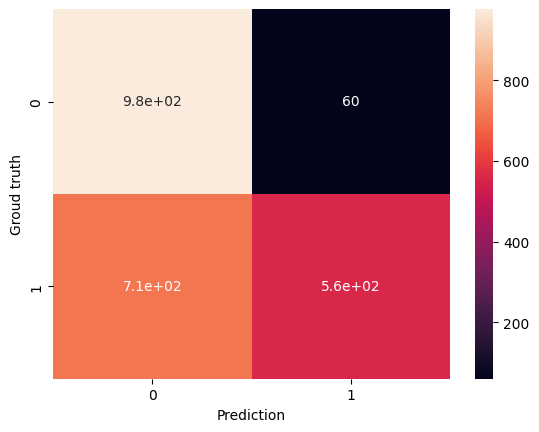

In [ ]:
cm = confusion_matrix(y_test, pred)
TN, FP, FN, TP = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
print('TPR', TP / (TP + FN))
print('FPR', FP / (FP + TN))

f = sns.heatmap(cm, annot=True)
plt.ylabel('Groud truth')
plt.xlabel('Prediction');

### Отсечка 0

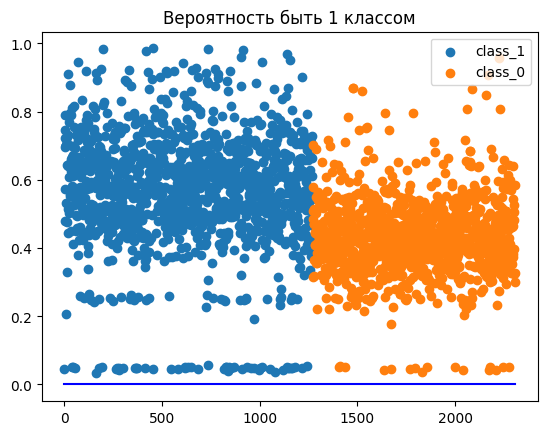

In [ ]:
threshold = 0

class_1 = pred_proba[:, 1][y_test == 1]
class_0 = pred_proba[:, 1][y_test == 0]

pred = np.where(pred_proba[:, 1] >= threshold, 1, 0)

plt.scatter(np.arange(len(class_1)), class_1, label='class_1')
plt.scatter(np.arange(len(class_1), len(class_1)+len(class_0)), class_0, label='class_0')
plt.plot([-0.2, len(pred_proba[:, 1])], [threshold, threshold], c='b')
plt.title('Вероятность быть 1 классом')
plt.legend();

TPR 1.0
FPR 1.0


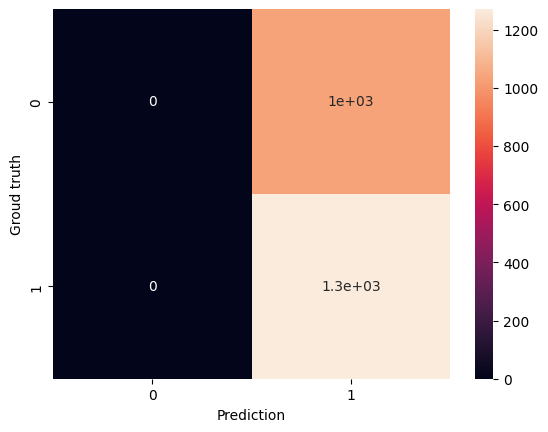

In [ ]:
cm = confusion_matrix(y_test, pred)
TN, FP, FN, TP = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
print('TPR', TP / (TP + FN))
print('FPR', FP / (FP + TN))

f = sns.heatmap(cm, annot=True)
plt.ylabel('Groud truth')
plt.xlabel('Prediction');

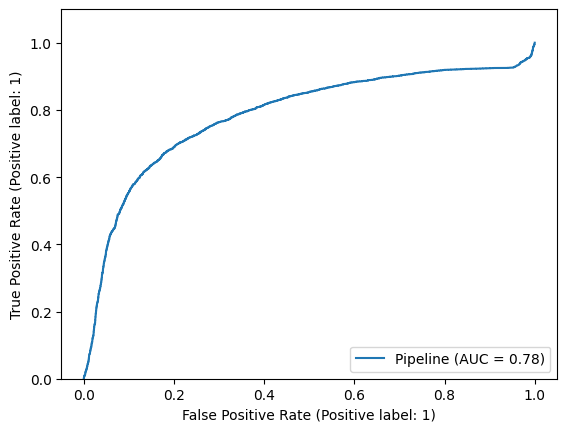

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve

RocCurveDisplay.from_estimator(model, X_train, y_train)
plt.ylim([0, 1.1]);

Давайте посчитаем ROC-кривую на тестовой выборке самостоятельно.

Объединим предсказанные вероятности быть первым классом и истинные целевые значения в датафрейм и отсортируем по пробе, вначале маленькие вероятности, затем большие.

In [ ]:
df_pred = pd.DataFrame({
    'proba': pred_proba[:, 1],
    'label': y_test
})

df_pred = df_pred.sort_values(by='proba')
df_pred

,proba,label
10608,0.033233,1
2127,0.036527,0
108,0.037907,1
7621,0.040645,1
9952,0.042512,1
...,...,...
8839,0.978465,1
3393,0.981794,1
2425,0.982207,1
4453,0.983354,1


### Отсечка 1

In [ ]:
threshold = 1
df_pred['pred_label'] = (df_pred['proba'] >= threshold).astype('int')

df_pred

,proba,label,pred_label
10608,0.033233,1,0
2127,0.036527,0,0
108,0.037907,1,0
7621,0.040645,1,0
9952,0.042512,1,0
...,...,...,...
8839,0.978465,1,0
3393,0.981794,1,0
2425,0.982207,1,0
4453,0.983354,1,0


TPR 0.0
FPR 0.0


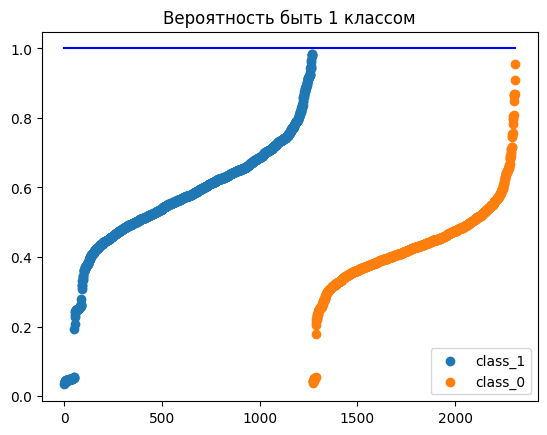

In [ ]:
class_1 = df_pred[df_pred.label == 1]
class_0 = df_pred[df_pred.label == 0]

cm = confusion_matrix(df_pred['label'], df_pred['pred_label'])
TN, FP, FN, TP = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
print('TPR', TPR)
print('FPR', FPR)

plt.scatter(np.arange(len(class_1)), class_1['proba'], label='class_1')
plt.scatter(np.arange(len(class_1), len(class_1)+len(class_0)), class_0['proba'], label='class_0')
plt.plot([-0.2, len(df_pred)], [threshold, threshold], c='b')
plt.title('Вероятность быть 1 классом')
plt.legend();

In [ ]:
TPRs = [0]
FPRs = [0]

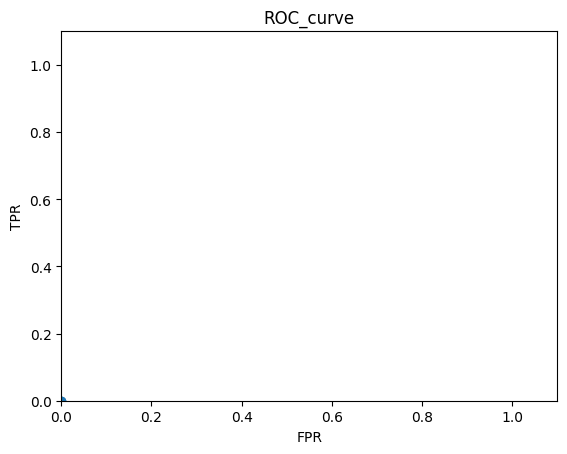

In [ ]:
TPRs.append(TPR)
FPRs.append(FPR)

plt.plot(FPRs, TPRs, marker='o')
plt.ylim([0, 1.1]);plt.xlim([0, 1.1])
plt.xlabel('FPR');plt.ylabel('TPR')
plt.title('ROC_curve');

### Отсечка 0.84

In [ ]:
threshold = 0.84
df_pred['pred_label'] = (df_pred['proba'] >= threshold).astype('int')

df_pred

,proba,label,pred_label
10608,0.033233,1,0
2127,0.036527,0,0
108,0.037907,1,0
7621,0.040645,1,0
9952,0.042512,1,0
...,...,...,...
8839,0.978465,1,1
3393,0.981794,1,1
2425,0.982207,1,1
4453,0.983354,1,1


TPR 0.03933910306845004
FPR 0.006750241080038573


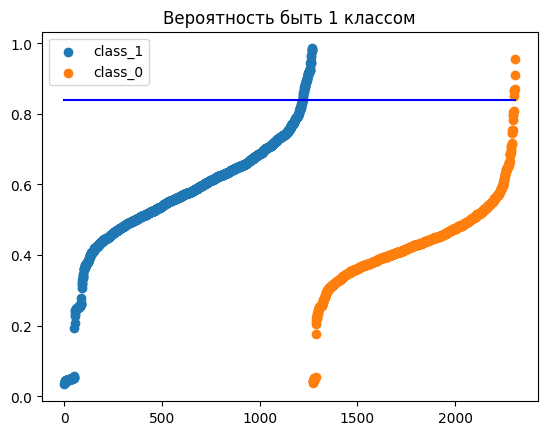

In [ ]:
class_1 = df_pred[df_pred.label == 1]
class_0 = df_pred[df_pred.label == 0]

cm = confusion_matrix(df_pred['label'], df_pred['pred_label'])
TN, FP, FN, TP = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
print('TPR', TPR)
print('FPR', FPR)

plt.scatter(np.arange(len(class_1)), class_1['proba'], label='class_1')
plt.scatter(np.arange(len(class_1), len(class_1)+len(class_0)), class_0['proba'], label='class_0')
plt.plot([-0.2, len(df_pred)], [threshold, threshold], c='b')
plt.title('Вероятность быть 1 классом')
plt.legend();

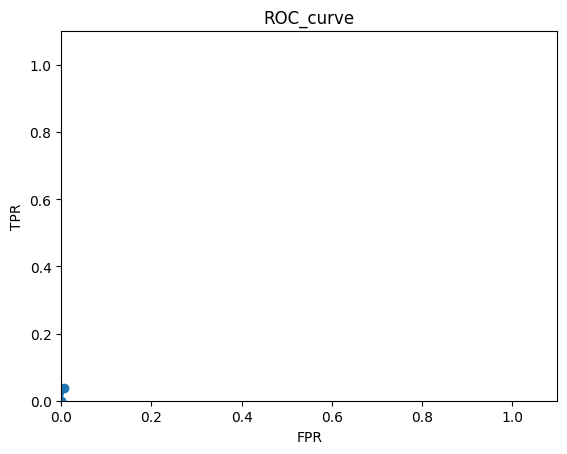

In [ ]:
TPRs.append(TPR)
FPRs.append(FPR)

plt.plot(FPRs, TPRs, marker='o')
plt.ylim([0, 1.1]);plt.xlim([0, 1.1])
plt.xlabel('FPR');plt.ylabel('TPR')
plt.title('ROC_curve');

### Отсечка 0.54

In [ ]:
threshold = 0.54
df_pred['pred_label'] = (df_pred['proba'] >= threshold).astype('int')

df_pred

,proba,label,pred_label
10608,0.033233,1,0
2127,0.036527,0,0
108,0.037907,1,0
7621,0.040645,1,0
9952,0.042512,1,0
...,...,...,...
8839,0.978465,1,1
3393,0.981794,1,1
2425,0.982207,1,1
4453,0.983354,1,1


TPR 0.6042486231313926
FPR 0.13211186113789777


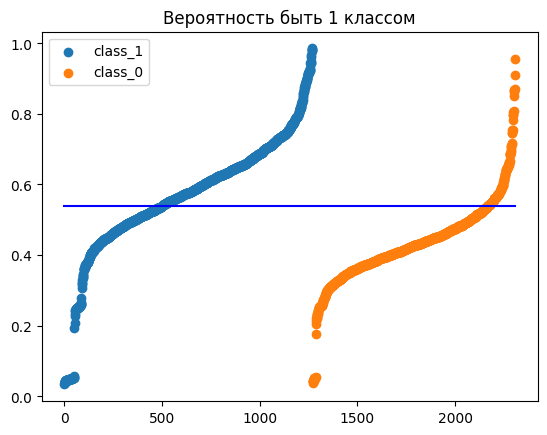

In [ ]:
class_1 = df_pred[df_pred.label == 1]
class_0 = df_pred[df_pred.label == 0]

cm = confusion_matrix(df_pred['label'], df_pred['pred_label'])
TN, FP, FN, TP = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
print('TPR', TPR)
print('FPR', FPR)

plt.scatter(np.arange(len(class_1)), class_1['proba'], label='class_1')
plt.scatter(np.arange(len(class_1), len(class_1)+len(class_0)), class_0['proba'], label='class_0')
plt.plot([-0.2, len(df_pred)], [threshold, threshold], c='b')
plt.title('Вероятность быть 1 классом')
plt.legend();

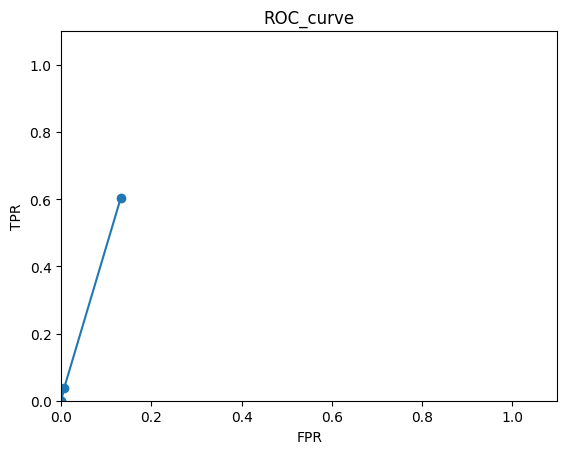

In [ ]:
TPRs.append(TPR)
FPRs.append(FPR)

plt.plot(FPRs, TPRs, marker='o')
plt.ylim([0, 1.1]);plt.xlim([0, 1.1])
plt.xlabel('FPR');plt.ylabel('TPR')
plt.title('ROC_curve');

### Отсечка 0

In [ ]:
threshold = 0
df_pred['pred_label'] = (df_pred['proba'] >= threshold).astype('int')

df_pred

,proba,label,pred_label
10608,0.033233,1,1
2127,0.036527,0,1
108,0.037907,1,1
7621,0.040645,1,1
9952,0.042512,1,1
...,...,...,...
8839,0.978465,1,1
3393,0.981794,1,1
2425,0.982207,1,1
4453,0.983354,1,1


TPR 1.0
FPR 1.0


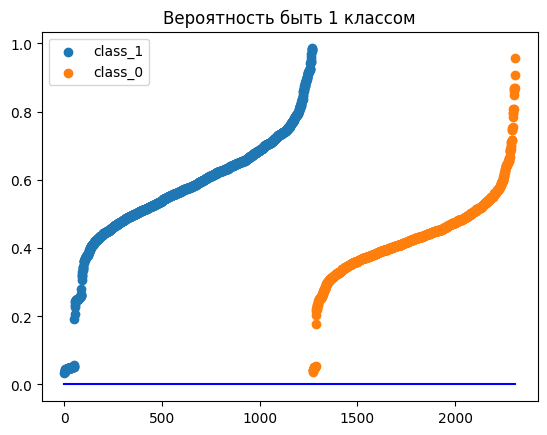

In [ ]:
class_1 = df_pred[df_pred.label == 1]
class_0 = df_pred[df_pred.label == 0]

cm = confusion_matrix(df_pred['label'], df_pred['pred_label'])
TN, FP, FN, TP = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
print('TPR', TPR)
print('FPR', FPR)

plt.scatter(np.arange(len(class_1)), class_1['proba'], label='class_1')
plt.scatter(np.arange(len(class_1), len(class_1)+len(class_0)), class_0['proba'], label='class_0')
plt.plot([-0.2, len(df_pred)], [threshold, threshold], c='b')
plt.title('Вероятность быть 1 классом')
plt.legend();

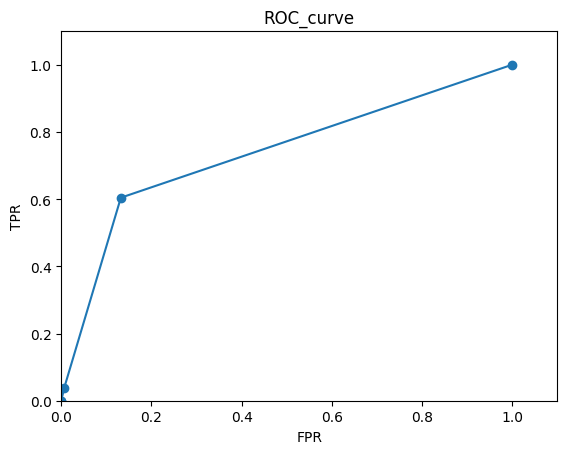

In [ ]:
TPRs.append(TPR)
FPRs.append(FPR)

plt.plot(FPRs, TPRs, marker='o')
plt.ylim([0, 1.1]);plt.xlim([0, 1.1])
plt.xlabel('FPR');plt.ylabel('TPR')
plt.title('ROC_curve');

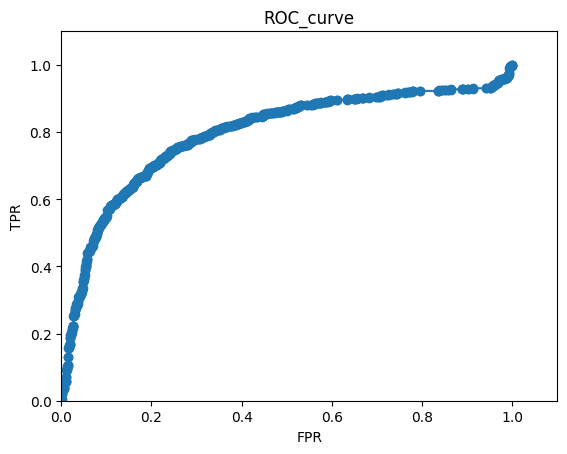

In [ ]:
fprs, tprs, thr = roc_curve(y_test, pred_proba[:, 1])

plt.plot(fprs, tprs, marker='o')
plt.ylim([0, 1.1]);plt.xlim([0, 1.1])
plt.xlabel('FPR');plt.ylabel('TPR')
plt.title('ROC_curve');

# 7 Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.

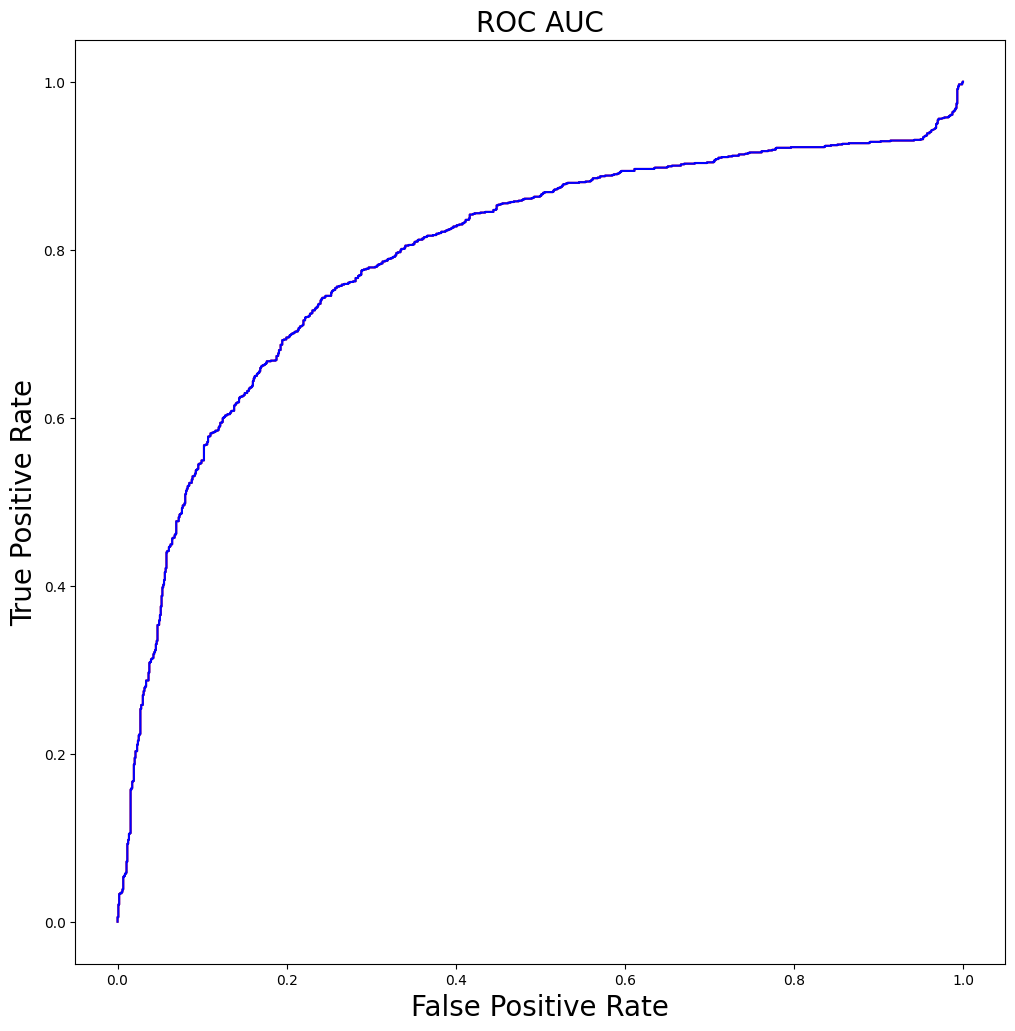

In [ ]:
plt.figure(figsize=(12, 12))
plt.plot(fpr, tpr, color="red")
plt.plot(fprs, tprs, color="blue")
plt.title('ROC AUC', fontdict={'fontsize': 20})
plt.xlabel('False Positive Rate', fontdict={'fontsize': 20})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 20})
plt.show()

## 8 *Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.

In [ ]:
#сортируем по возрастанию, чтобы считать от начала кривой
fprs.sort()
tprs.sort()
#кастомная метрика roc_auc - аналог roc_auc_score, очень приблизительно моделируем площадь фигуры как сумму фигур по шагам
custom_roc_auc = 0
prev_fpr = 0
prev_tpr = 0
for index in range(len(fprs)):
    if(index != 0):
        custom_roc_auc += ((tprs[index] - prev_tpr) * (fprs[index] - prev_fpr) / 2) + (tprs[index] * (fprs[index] - prev_fpr))
        prev_tpr = tprs[index]
        prev_fpr = fprs[index]
print(custom_roc_auc)

0.92005626591868


In [ ]:
from sklearn.metrics import auc

auc(fprs, tprs), auc(FPRs, TPRs)

(0.7928020442676819, 0.7366275501184726)

#### Оценка качества модели
Считаем accuracy последней модели

In [ ]:
predictions[:2]

array([[0.83040915, 0.16959085],
       [0.51400122, 0.48599878]])

In [ ]:
model.score(X_train, y_train)

0.7768823393967303

In [ ]:
model.score(X_test, y_test)

0.7753222836095764

## 9 Сформулируйте выводы по проделанной работе:

### a как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?

In [ ]:
from sklearn.metrics import auc

auc(fprs, tprs), auc(FPRs, TPRs)

(0.7928020442676819, 0.7366275501184726)

## Выводы:
1 Были убраны пустые значения

2 Категориальные признаки были перекодированы

3 Для себя сделал вывод, что нужно очень внимательно указывать датасет для обучения, иначе можно потратить много времени на устранение несуществующей ошибки :)

4 Сделал подсчет метрик вручную двум способами: 1 - из лекции, 2 - ихз доп материалов, втворой треубет уточнения и он более сложен, так как каждую точку нужно строить на основе получаемых графиков и подсчитываемых значений

5 Вручную и автоматически метрики отличаются незначительно, что видно на графике

6 Точность модели достаточно хорошая, но лучше использовать встроенную метрику

### b *может ли ROC-кривая проходить ниже диагонали?

Результат:
- проведена оценка качества модели классификации;
- реализован подсчет «вручную» основных метрик, проведено сравнение полученных результатов с готовыми функциями из библиотеки sklearn.